In [9]:
pip install -q kaggle


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
!touch ~/.kaggle/kaggle.json

In [12]:
api_token = {"username":"jonathanmau", "key":"91bb7eeec82eb054f0137915739f9575"}

In [13]:
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [14]:
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force


100%|██████████████████████████████████████▊| 2.29G/2.29G [00:11<00:00, 192MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [00:25<00:00, 96.7MB/s]


In [16]:
import zipfile
with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [27]:
import glob
import random
import matplotlib.pyplot as plt



def get_random_image(dir, condition):
    placeholder = ''
    if condition == 'n':
        placeholder = 'NORMAL'
    elif condition =='p':
        placeholder = 'PNEUMONIA'
    else:
        raise Exception("Sorry, invalid condition")
    folder = f"./data/chest_xray/{dir}/{placeholder}/*.jpeg"
    img_paths=glob.glob(folder)
    max_length=len(img_paths)
    randomNumber = random.randint(0, max_length)
    
    for index, item in enumerate(img_paths, start=1):
        if index == randomNumber:
            print(index, item)
            image = plt.imread(item)
            readyImage = plt.imshow(image)
            plt.show()
            return readyImage
    

12 ./data/chest_xray/test/PNEUMONIA/person94_bacteria_456.jpeg


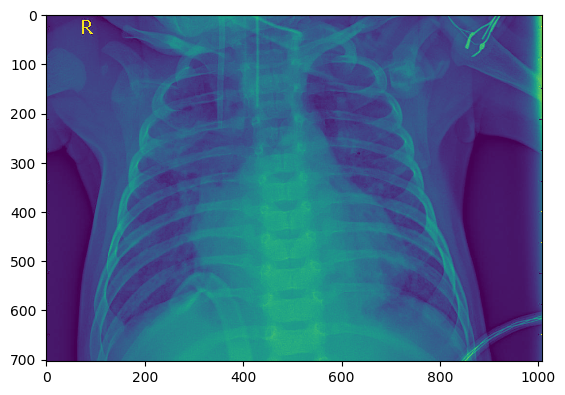

In [31]:
get_random_image("test", "p")

In [33]:
from PIL import Image

image = Image.open('data/chest_xray/test/PNEUMONIA/person94_bacteria_456.jpeg')
print(image.format)
print(image.size)
print(image.mode)


JPEG
(1008, 704)
L


In [ ]:
# to convert rgba to rgb

# import PIL.Image

# rgba_image=PIL.Image.open('your_path')
# rgb_image = rgba_image.convert('RGB')




In [40]:
# loop through all images and convert to 224 by 224 and correct color format

import glob
import matplotlib.pyplot as plt
from PIL import Image

folder = './data/chest_xray/train/*/*.jpeg'



counterPneu = 0
counterNormal = 0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
    # depectis pheumonia
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        # need to omit cmap for color images
        plt.imsave(fname='./data/chest_xray/train' + '/train_pneumonia' + str(counterPneu) + '.jpeg', arr=im, format = 'jpeg', cmap = 'gray')
        counterPneu += 1
    else:
        plt.imsave(fname='./data/chest_xray/train' + '/train_normal' + str(counterNormal) + '.jpeg', arr=im, format = 'jpeg', cmap = 'gray')
        counterNormal += 1
        


In [42]:
# loop through all images and convert to 224 by 224 and correct color format

import glob
import matplotlib.pyplot as plt
from PIL import Image

folder = './data/chest_xray/test/*/*.jpeg'



counterPneu = 0
counterNormal = 0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
    # depectis pheumonia
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        # need to omit cmap for color images
        plt.imsave(fname='./data/chest_xray/test' + '/test_pneumonia' + str(counterPneu) + '.jpeg', arr=im, format = 'jpeg', cmap = 'gray')
        counterPneu += 1
    else:
        plt.imsave(fname='./data/chest_xray/test' + '/test_normal' + str(counterNormal) + '.jpeg', arr=im, format = 'jpeg', cmap = 'gray')
        counterNormal += 1
        

In [43]:
# loop through all images and convert to 224 by 224 and correct color format

import glob
import matplotlib.pyplot as plt
from PIL import Image

folder = './data/chest_xray/val/*/*.jpeg'



counterPneu = 0
counterNormal = 0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
    # depectis pheumonia
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        # need to omit cmap for color images
        plt.imsave(fname='./data/chest_xray/val' + '/val_pneumonia' + str(counterPneu) + '.jpeg', arr=im, format = 'jpeg', cmap = 'gray')
        counterPneu += 1
    else:
        plt.imsave(fname='./data/chest_xray/val' + '/val_normal' + str(counterNormal) + '.jpeg', arr=im, format = 'jpeg', cmap = 'gray')
        counterNormal += 1
        

In [ ]:
# delete NORMAL AND PNEUMONIA folders in each test train val

In [ ]:
# section 4 data visualization

In [45]:
# val normal filepath.jpeg
# test pneumonia filepath.jpeg


import glob
import pandas as pd

folder = './data/chest_xray/*/*.jpeg'

category = []
condition_of_lungs = []
filenames = []

all_files = glob.glob(folder)

for filename in all_files:
    if "train" in filename:
        if "pneumonia" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lungs.append("pneumonia")
        elif "normal" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lungs.append("normal")
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lungs.append("pneumonia")
        elif "normal" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lungs.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lungs.append("pneumonia")
        elif "normal" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lungs.append("normal")
print(category)
all_data_df = pd.DataFrame({"dataset type": category, "x-ray result": condition_of_lungs, "filename": filenames})
print(all_data_df.head())
            


['test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test', 'test',

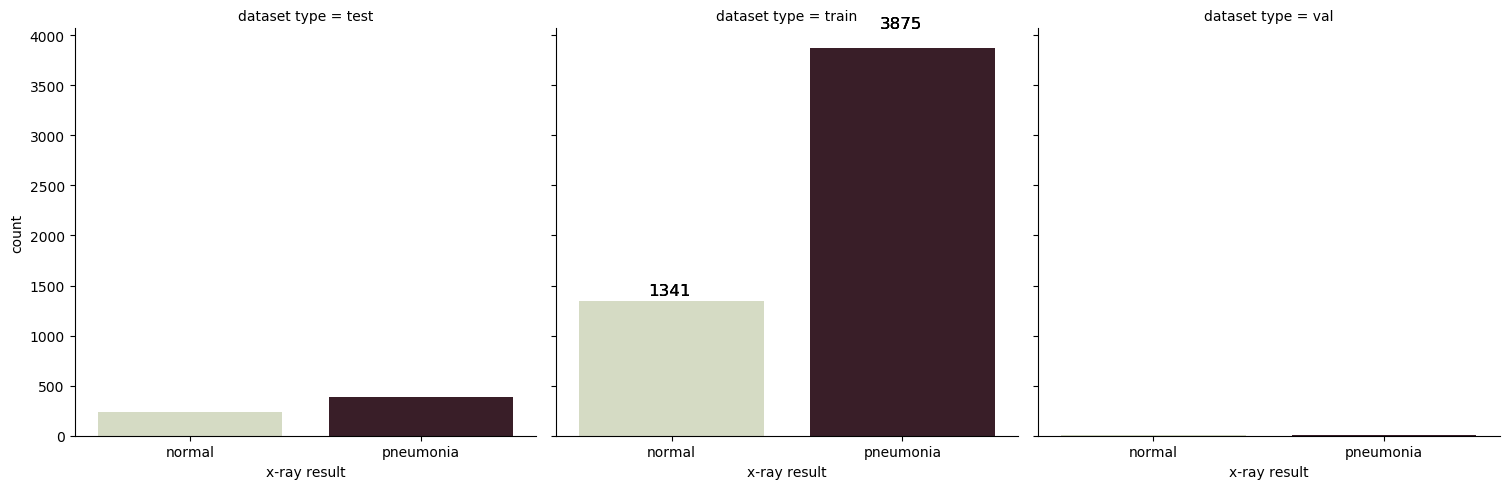

None

In [53]:
import seaborn as sns

g = sns.catplot(x="x-ray result", col = "dataset type", kind = "count", palette="ch:.55", data = all_data_df, legend = True)

for i in range(0,3):
    ax=g.facet_axis(0,1)
    for p in ax.patches:
        ax.text(
            p.get_x()+0.3, 
            p.get_height()*1.05, 
            '{0:.0f}'.format(p.get_height()),
            color='black',
            rotation='horizontal',
            size = 'large'
        )
display(plt.show())